In [ ]:
!kaggle datasets download peterandersen94/danish-pharmacy-sales-data-for-april-2023
!unzip danish-pharmacy-sales-data-for-april-2023.zip

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from prophet import Prophet

In [12]:
df=pd.read_csv('/content/pharmacy_sales_april_2023.csv')
df.head()

,SaleID,Time,DrugID,DrugName,DrugClass,Price,ExpDate,Quantity
0,12005226,4/1/2023 9:04,D0051,Ciprofloxacin,Psychotropic,106,2024-03,6
1,12005226,4/1/2023 9:04,D0051,Olmesartan,Analgesic,170,2023-10,2
2,12005227,4/1/2023 9:05,D0049,Donepezil,Antiviral,184,2024-03,5
3,12005227,4/1/2023 9:05,D0061,Fexofenadine,Hormonal,54,2023-05,6
4,12005227,4/1/2023 9:05,D0034,Naproxen,Respiratory,50,2024-01,3


In [13]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('SaleID')
df.head()

,Time,DrugID,DrugName,DrugClass,Price,ExpDate,Quantity
SaleID,,,,,,,
12005226,2023-04-01 09:04:00,D0051,Ciprofloxacin,Psychotropic,106,2024-03,6
12005226,2023-04-01 09:04:00,D0051,Olmesartan,Analgesic,170,2023-10,2
12005227,2023-04-01 09:05:00,D0049,Donepezil,Antiviral,184,2024-03,5
12005227,2023-04-01 09:05:00,D0061,Fexofenadine,Hormonal,54,2023-05,6
12005227,2023-04-01 09:05:00,D0034,Naproxen,Respiratory,50,2024-01,3


In [8]:
df.shape

(20003, 7)

In [15]:
df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = df['Time'].dt.day
df['Weekday'] = df['Time'].dt.weekday
df['TotalSales'] = df['Price'] * df['Quantity']
sales_by_drugclass = df.groupby('DrugClass')['TotalSales'].sum().sort_values(ascending=False)
sales_by_drugclass

,TotalSales
DrugClass,
Psychotropic,1490824
Immunosuppressant,1351674
Hormonal,1028475
Diabetes,982591
Antiviral,962676
Respiratory,947412
Oncology,846147
Analgesic,755289
Neurological,712154


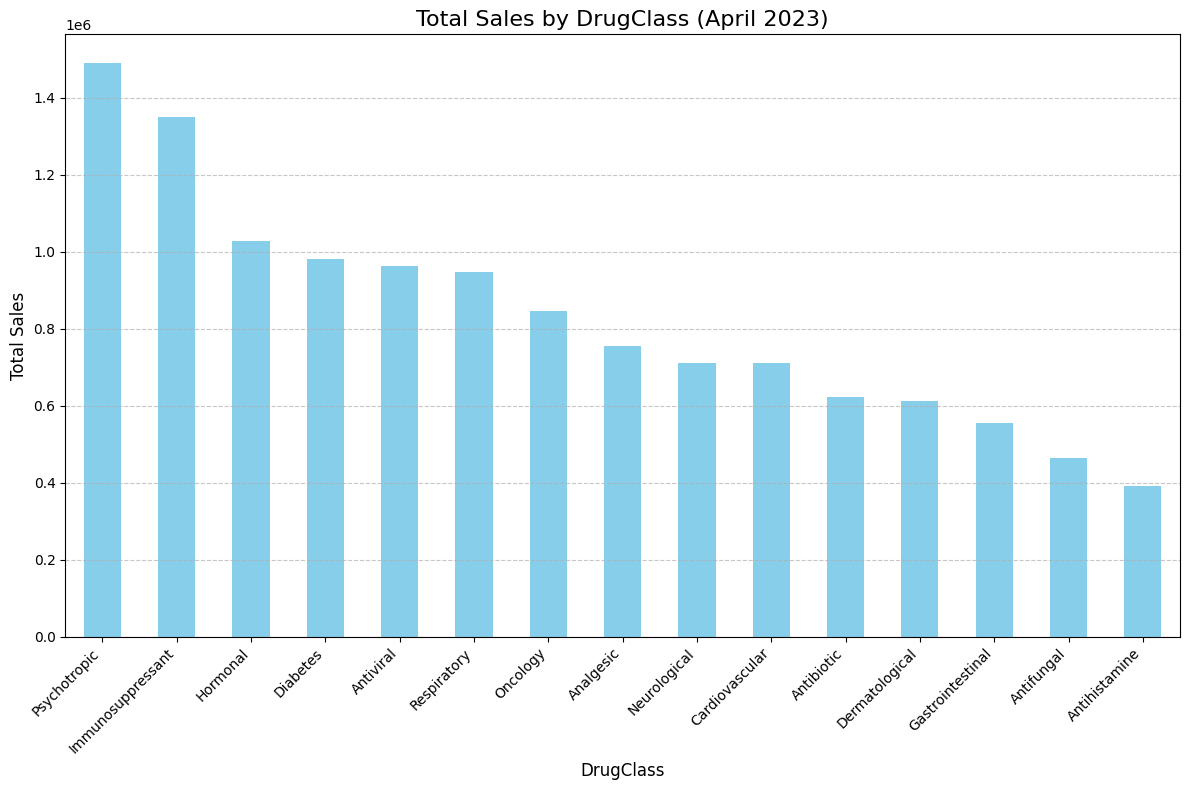

In [16]:
plt.figure(figsize=(12, 8))
sales_by_drugclass.plot(kind='bar', color='skyblue')
plt.title('Total Sales by DrugClass (April 2023)', fontsize=16)
plt.xlabel('DrugClass', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
features = df[['DrugClass', 'Price', 'Quantity', 'Day', 'Weekday']]
target = df['TotalSales']

In [19]:
encoder = OneHotEncoder(sparse_output=False)
encoded_classes = encoder.fit_transform(features[['DrugClass']])
encoded_df = pd.DataFrame(encoded_classes, columns=encoder.get_feature_names_out(['DrugClass']))

In [20]:
features = pd.concat([features.drop('DrugClass', axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

MAE: 2.2494376405899378e-05
R^2 Score: 0.999999999996859


In [24]:
sales_ts = df.groupby(df['Time'].dt.date)['TotalSales'].sum().reset_index()
sales_ts.columns = ['ds', 'y']

In [ ]:
prophet_model = Prophet()
prophet_model.fit(sales_ts)

In [28]:
future = prophet_model.make_future_dataframe(periods=20)
forecast = prophet_model.predict(future)

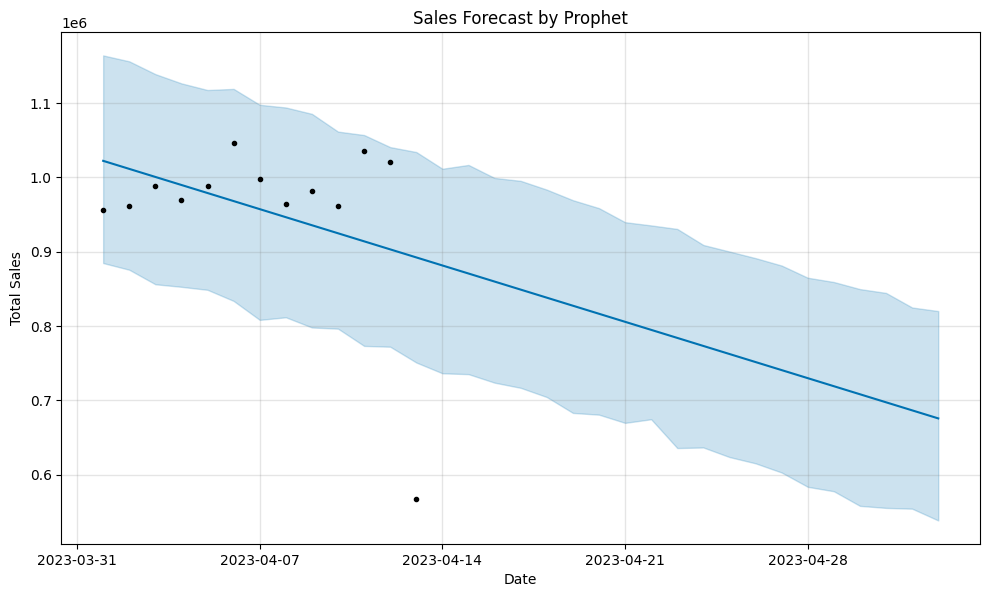

In [29]:
fig = prophet_model.plot(forecast)
plt.title('Sales Forecast by Prophet')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/3l4nt4s7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/klb_f7n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30077', 'data', 'file=/tmp/tmp3bfwo27q/3l4nt4s7.json', 'init=/tmp/tmp3bfwo27q/klb_f7n7.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_model4ulpc95w/prophet_model-20250223022728.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:28 - cmdstanpy - INFO - Chain [1] start processing
IN

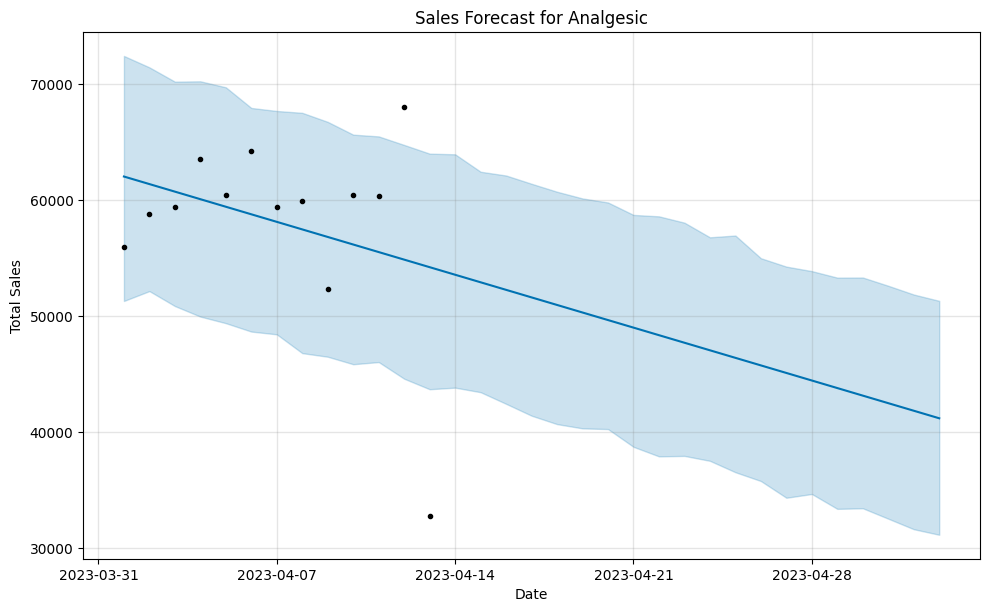

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/v4hn_s0p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/wyfc40ka.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73820', 'data', 'file=/tmp/tmp3bfwo27q/v4hn_s0p.json', 'init=/tmp/tmp3bfwo27q/wyfc40ka.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_model85wxerpa/prophet_model-20250223022729.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:29 - cmdstanpy - INFO - Chain [1] start processing
IN

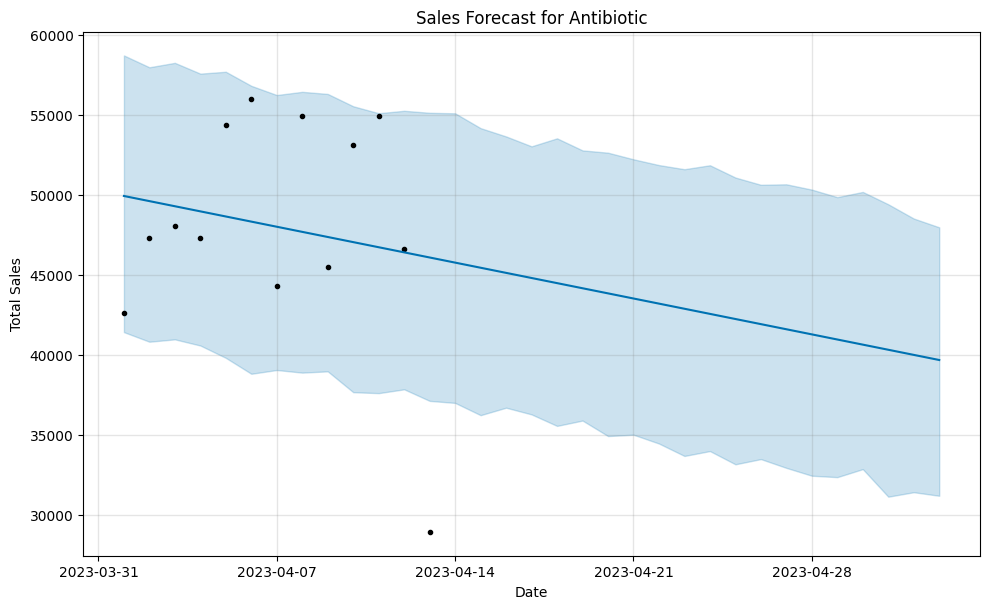

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/2aih1dec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/z2h35drm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52093', 'data', 'file=/tmp/tmp3bfwo27q/2aih1dec.json', 'init=/tmp/tmp3bfwo27q/z2h35drm.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modelct3i7yjo/prophet_model-20250223022730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:30 - cmdstanpy - INFO - Chain [1] start processing
IN

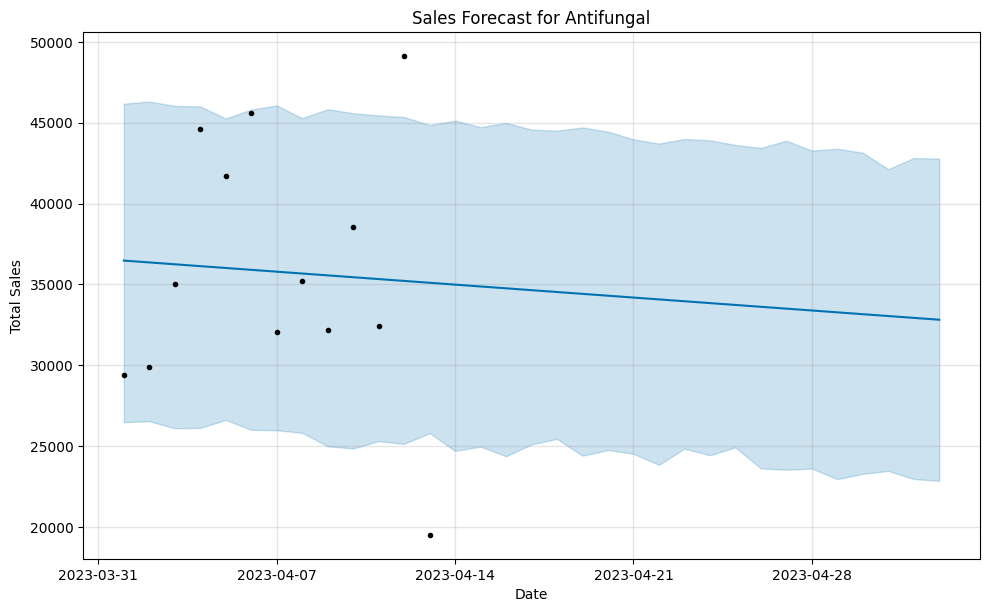

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/fk43tr3z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/j6jjs7eg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21397', 'data', 'file=/tmp/tmp3bfwo27q/fk43tr3z.json', 'init=/tmp/tmp3bfwo27q/j6jjs7eg.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modelsqwsa0xa/prophet_model-20250223022731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:31 - cmdstanpy - INFO - Chain [1] start processing
IN

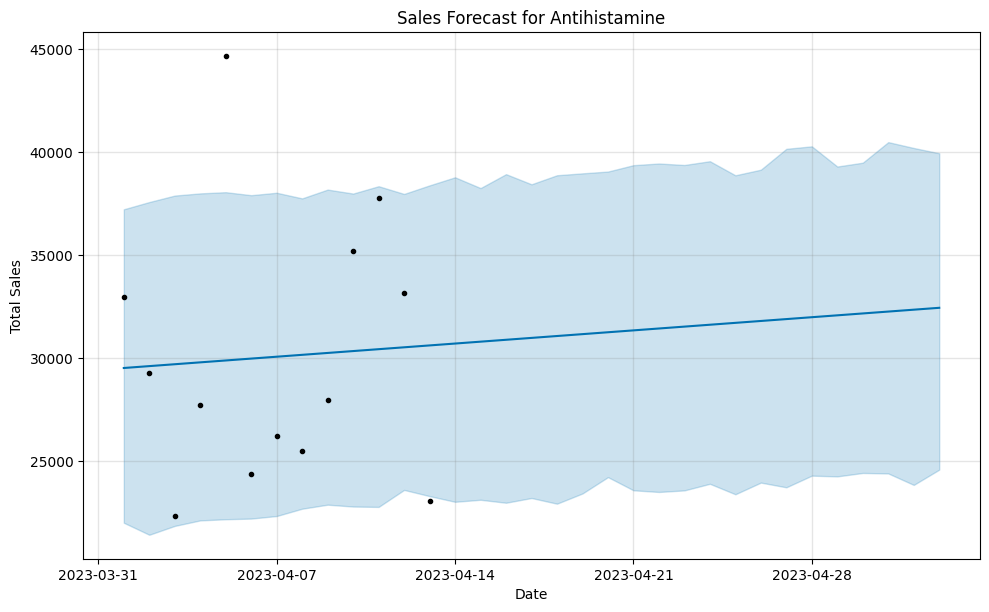

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/v6hr0ozz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/3ezt2pdw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97724', 'data', 'file=/tmp/tmp3bfwo27q/v6hr0ozz.json', 'init=/tmp/tmp3bfwo27q/3ezt2pdw.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_model0tkns5u9/prophet_model-20250223022732.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:32 - cmdstanpy - INFO - Chain [1] start processing
IN

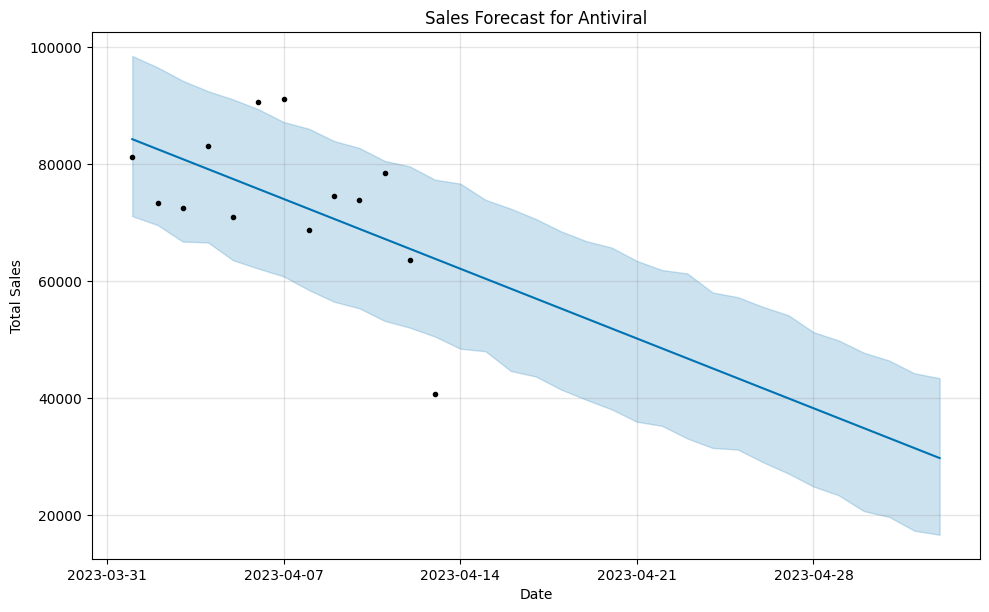

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/zivbqglq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/8iozht3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1312', 'data', 'file=/tmp/tmp3bfwo27q/zivbqglq.json', 'init=/tmp/tmp3bfwo27q/8iozht3n.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modell647jgf1/prophet_model-20250223022732.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:32 - cmdstanpy - INFO - Chain [1] start processing
INF

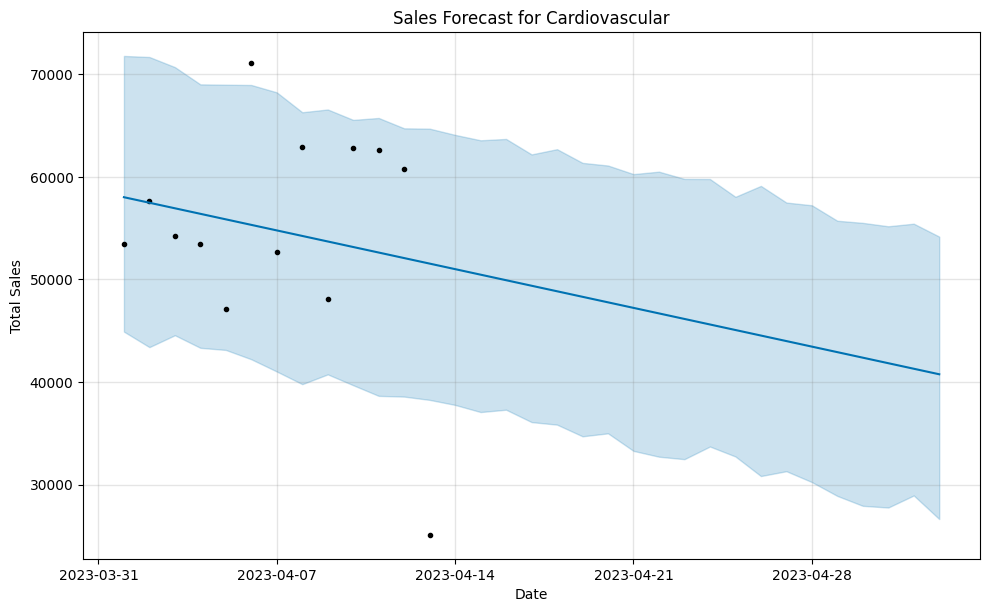

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/s5z89759.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/_brrjfbp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53554', 'data', 'file=/tmp/tmp3bfwo27q/s5z89759.json', 'init=/tmp/tmp3bfwo27q/_brrjfbp.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modellr1cqgrt/prophet_model-20250223022733.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:33 - cmdstanpy - INFO - Chain [1] start processing
IN

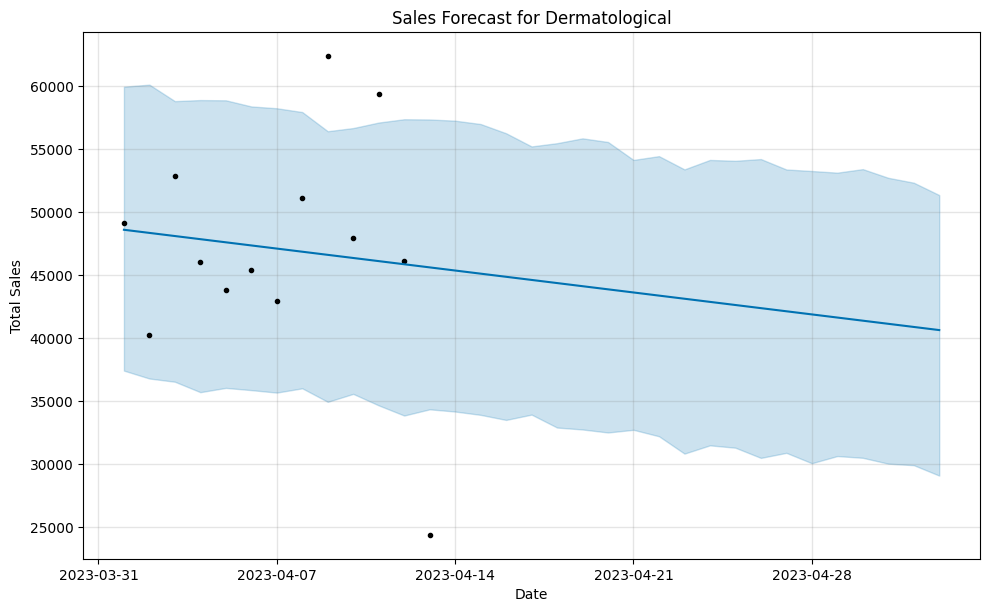

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/focbxc00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/rf0j8t1m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62724', 'data', 'file=/tmp/tmp3bfwo27q/focbxc00.json', 'init=/tmp/tmp3bfwo27q/rf0j8t1m.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modelxv7mij65/prophet_model-20250223022733.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:33 - cmdstanpy - INFO - Chain [1] start processing
IN

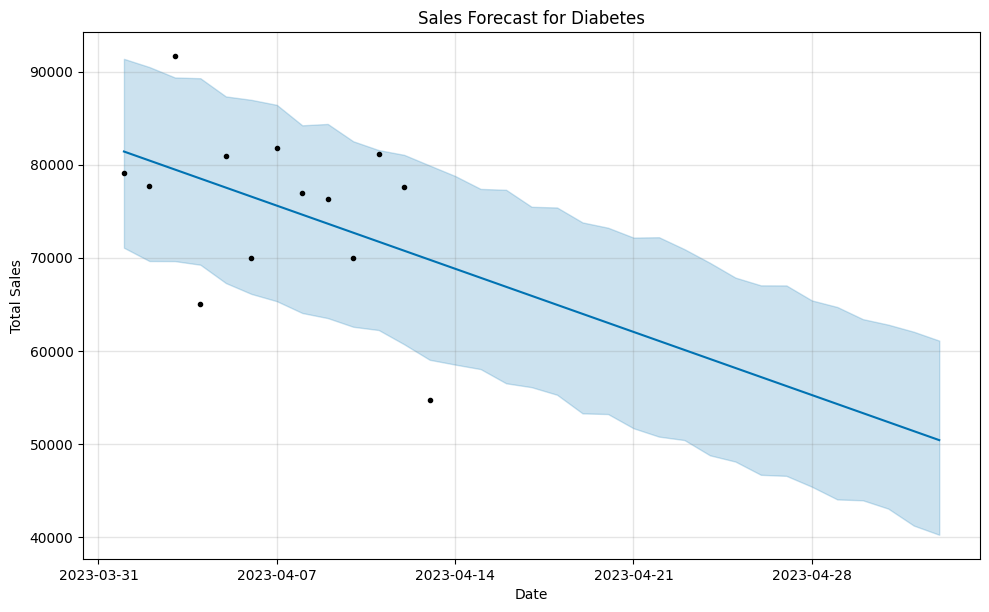

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/fks0ilwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/8_52ra2g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61723', 'data', 'file=/tmp/tmp3bfwo27q/fks0ilwh.json', 'init=/tmp/tmp3bfwo27q/8_52ra2g.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modelzgtwt22z/prophet_model-20250223022734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:34 - cmdstanpy - INFO - Chain [1] start processing
IN

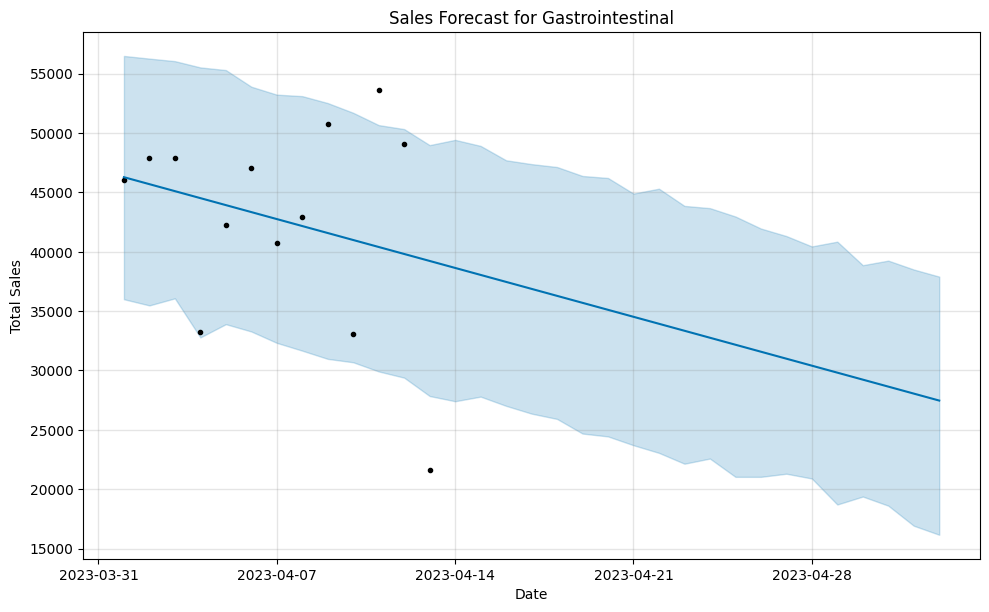

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/o4p5iip1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/a9r76aex.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99179', 'data', 'file=/tmp/tmp3bfwo27q/o4p5iip1.json', 'init=/tmp/tmp3bfwo27q/a9r76aex.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_model1z5ejsha/prophet_model-20250223022734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:34 - cmdstanpy - INFO - Chain [1] start processing
IN

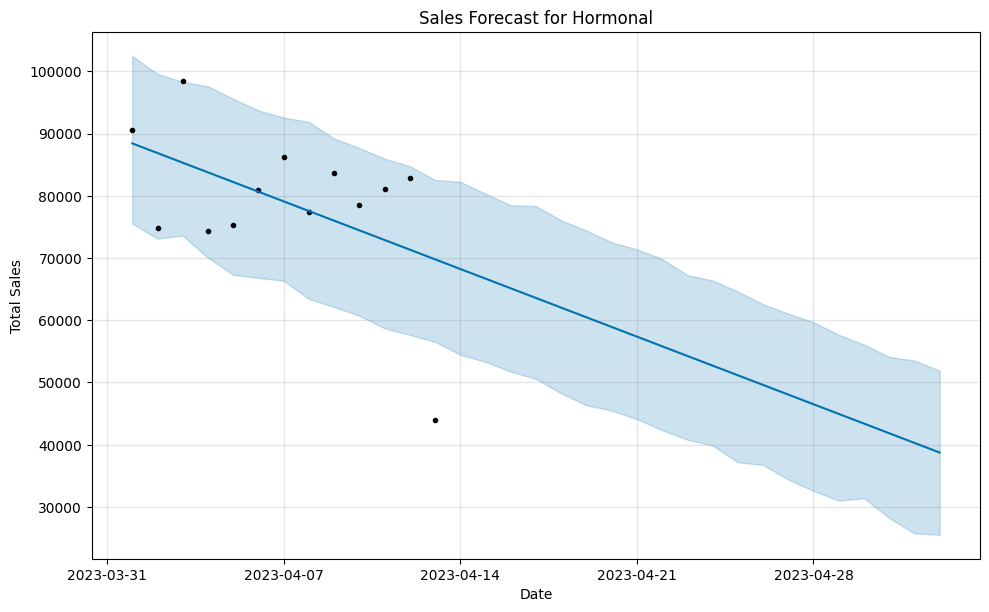

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/vdauu8bb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/901r1unn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19456', 'data', 'file=/tmp/tmp3bfwo27q/vdauu8bb.json', 'init=/tmp/tmp3bfwo27q/901r1unn.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modelfv73pdyc/prophet_model-20250223022735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:35 - cmdstanpy - INFO - Chain [1] start processing
IN

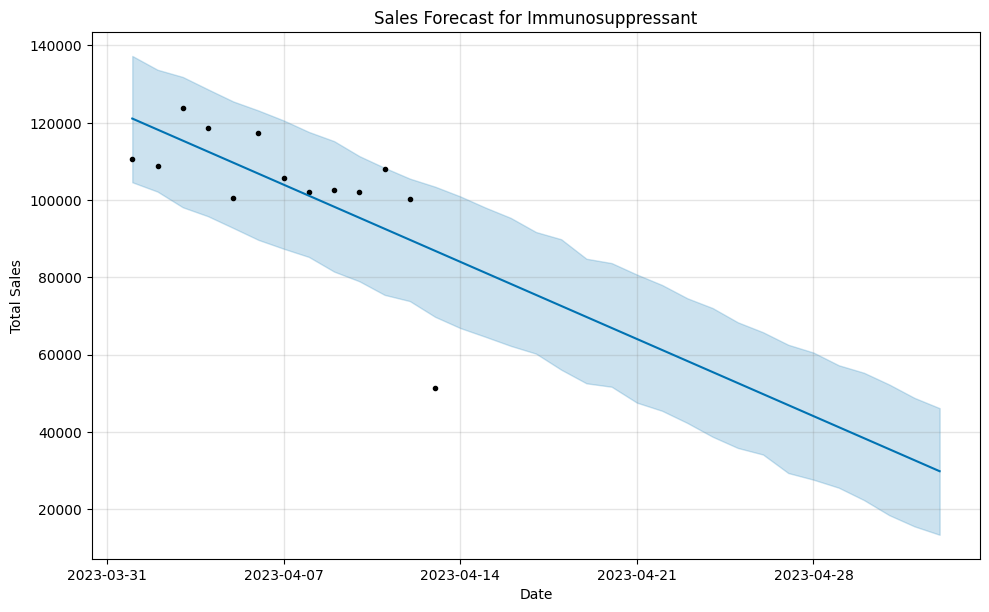

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/xegy0g0k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/sya7h8pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66846', 'data', 'file=/tmp/tmp3bfwo27q/xegy0g0k.json', 'init=/tmp/tmp3bfwo27q/sya7h8pp.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_model_7utvnn5/prophet_model-20250223022735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:35 - cmdstanpy - INFO - Chain [1] start processing
IN

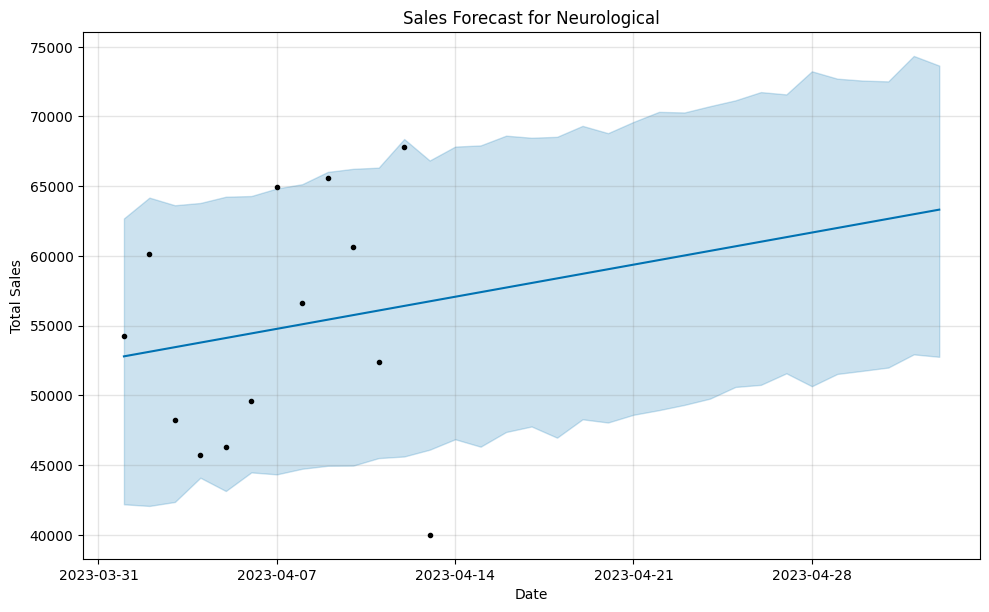

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/k6o3sln0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/3qvrkebc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37533', 'data', 'file=/tmp/tmp3bfwo27q/k6o3sln0.json', 'init=/tmp/tmp3bfwo27q/3qvrkebc.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_model6efe_mt5/prophet_model-20250223022736.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:36 - cmdstanpy - INFO - Chain [1] start processing
IN

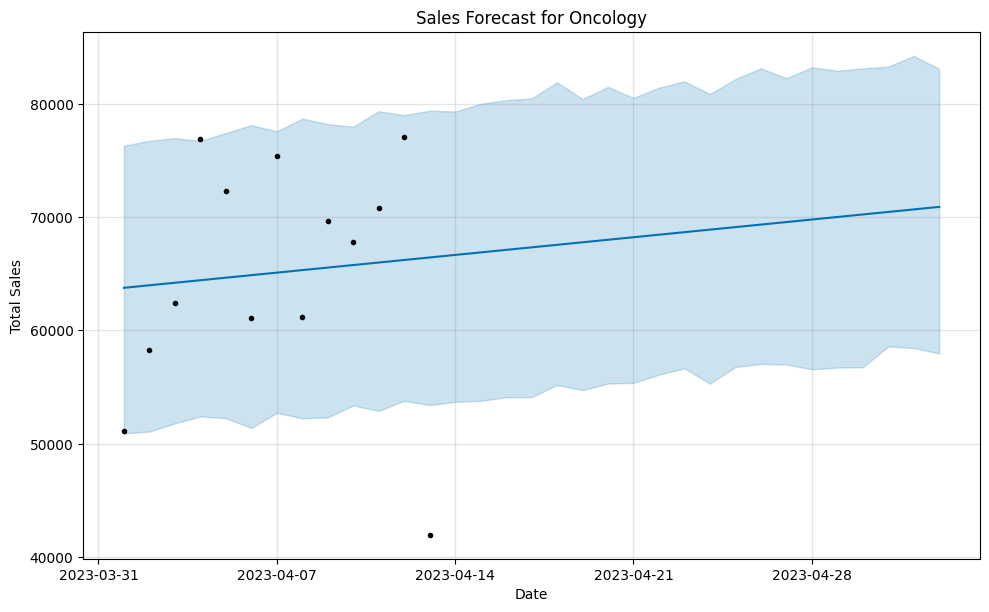

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/y4sv40uj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/fvjf7se3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81308', 'data', 'file=/tmp/tmp3bfwo27q/y4sv40uj.json', 'init=/tmp/tmp3bfwo27q/fvjf7se3.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modeln54i7k_9/prophet_model-20250223022736.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:36 - cmdstanpy - INFO - Chain [1] start processing
IN

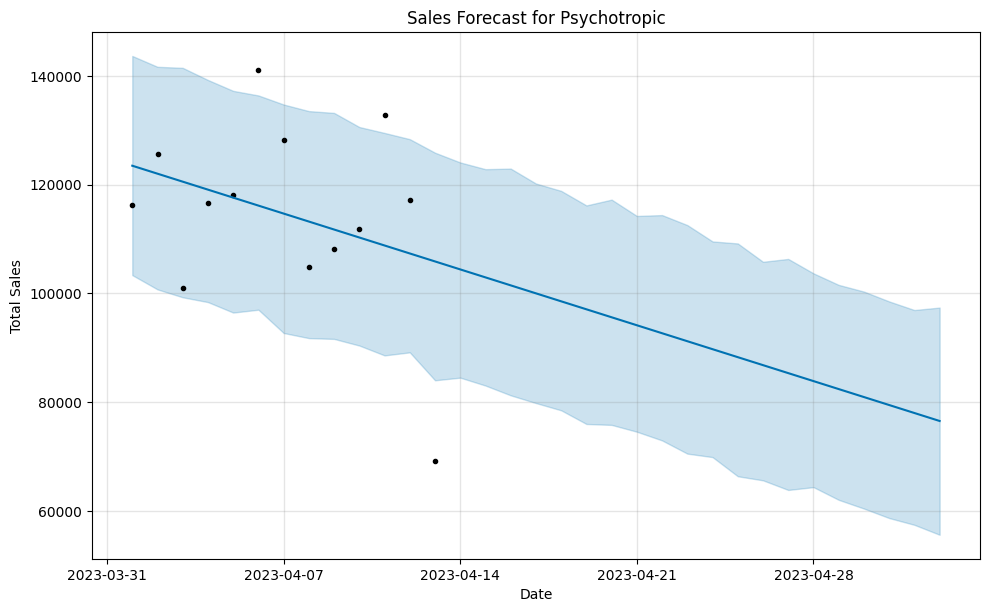

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/e5hv462n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3bfwo27q/iz2sclgd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23805', 'data', 'file=/tmp/tmp3bfwo27q/e5hv462n.json', 'init=/tmp/tmp3bfwo27q/iz2sclgd.json', 'output', 'file=/tmp/tmp3bfwo27q/prophet_modelu0qdw9jc/prophet_model-20250223022737.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:27:37 - cmdstanpy - INFO - Chain [1] start processing
IN

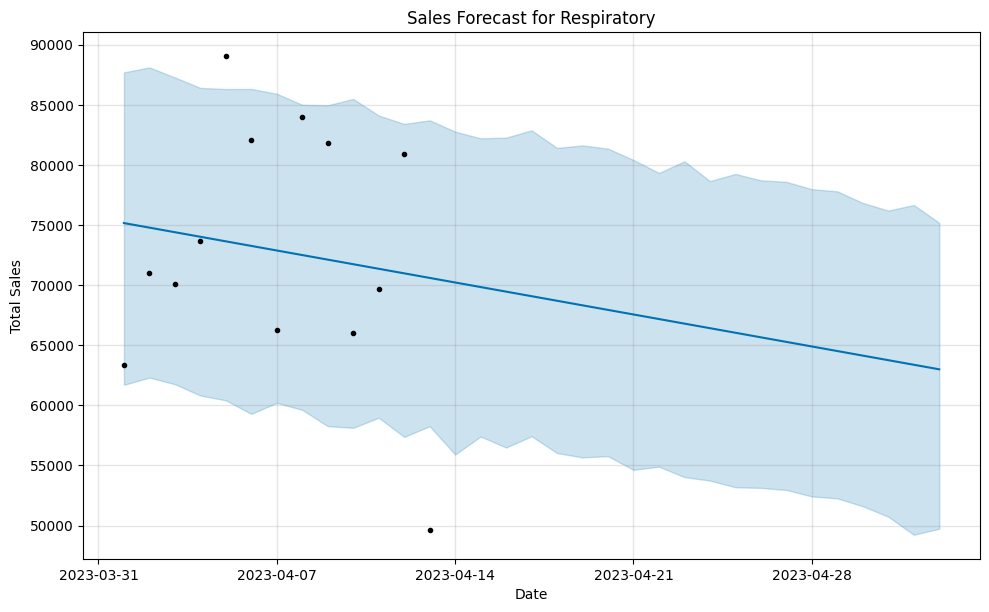

In [30]:
sales_by_class_date = df.groupby(['DrugClass', df['Time'].dt.date])['TotalSales'].sum().reset_index()
drug_class_forecasts = {}

for drug_class in sales_by_class_date['DrugClass'].unique():
  drug_class_data = sales_by_class_date[sales_by_class_date['DrugClass'] == drug_class].copy()
  drug_class_data.columns = ['DrugClass', 'ds', 'y']  # Rename columns for Prophet
  model = Prophet()
  model.fit(drug_class_data[['ds', 'y']])
  future = model.make_future_dataframe(periods=20)

  forecast = model.predict(future)
  drug_class_forecasts[drug_class] = {'model': model, 'forecast': forecast}
  fig = model.plot(forecast)
  plt.title(f'Sales Forecast for {drug_class}')
  plt.xlabel('Date')
  plt.ylabel('Total Sales')
  plt.show()

In [32]:
drug_class_name = 'Immunosuppressant'
if drug_class_name in drug_class_forecasts:
    forecast_df = drug_class_forecasts[drug_class_name]['forecast']
    print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20))
else:
    print(f"No forecast found for drug class '{drug_class_name}'.")

           ds          yhat    yhat_lower     yhat_upper
13 2023-04-14  84002.606244  66867.772697  100929.073469
14 2023-04-15  81151.358355  64596.902822   98030.806224
15 2023-04-16  78300.110465  62254.090619   95372.238249
16 2023-04-17  75448.862575  60255.722646   91716.726497
17 2023-04-18  72597.614685  56093.711247   89848.495201
18 2023-04-19  69746.366795  52566.158522   84801.338547
19 2023-04-20  66895.118905  51680.445808   83674.620707
20 2023-04-21  64043.871016  47566.767205   80709.551137
21 2023-04-22  61192.623126  45454.324018   78007.997744
22 2023-04-23  58341.375236  42311.892694   74572.125093
23 2023-04-24  55490.127346  38745.996606   72049.441457
24 2023-04-25  52638.879456  35844.439432   68361.116764
25 2023-04-26  49787.631566  34140.159206   65789.192619
26 2023-04-27  46936.383677  29355.074348   62545.878596
27 2023-04-28  44085.135787  27633.336595   60526.710578
28 2023-04-29  41233.887897  25563.037916   57244.311572
29 2023-04-30  38382.640007  22

In [33]:
df.columns

Index(['Time', 'DrugID', 'DrugName', 'DrugClass', 'Price', 'ExpDate',
       'Quantity', 'Day', 'Weekday', 'TotalSales'],
      dtype='object')

In [34]:
drug_class_name = input('Enter one of the drugtype: ')
val=int(input("Enter no. of days: "))
if drug_class_name in drug_class_forecasts:
    forecast_df = drug_class_forecasts[drug_class_name]['forecast']
    print(forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(val))
else:
    print(f"No forecast found for drug class '{drug_class_name}'.")

Enter one of the drugtype: Antiviral
Enter no. of days: 5
           ds          yhat    yhat_lower    yhat_upper
28 2023-04-29  36562.168952  23370.837680  49851.147784
29 2023-04-30  34858.247534  20672.159023  47757.490077
30 2023-05-01  33154.326115  19684.394595  46415.803651
31 2023-05-02  31450.404697  17318.077081  44240.820789
32 2023-05-03  29746.483279  16627.663914  43409.323633
